# Predicting Movie Genres using their scripts

In [2]:
import numpy as np
import pandas as pd
import math
import random

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

from fastai import *
from fastai.tabular import *

### The dataset
- movies.csv is a large dataset containing the scripts of 242 movies
- The features are the proportions of each of 5000 common words in the scripts

In [5]:
movie_df = pd.read_csv('project3/movies.csv')

In [6]:
movie_df.shape

(242, 5006)

In [54]:
np.random.seed(5)
movie = movie_df.sample(frac=1)
movie = movie.drop(['Title','Year','Rating','# Votes','# Words'], axis=1)

In [55]:
movie = movie.replace(0, 0.000001)
movie.head()

,Genre,i,the,to,a,it,and,that,of,your,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
180,romance,0.036421,0.029929,0.022961,0.029454,0.022328,0.016310,0.019002,0.010293,0.011718,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
162,action,0.023057,0.045455,0.023386,0.026021,0.020751,0.016140,0.012516,0.012187,0.015810,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
119,action,0.029278,0.041635,0.031559,0.018061,0.015019,0.012928,0.010076,0.020152,0.011217,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
187,action,0.038158,0.043860,0.021930,0.013158,0.014912,0.014035,0.012719,0.021930,0.022807,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
46,action,0.049335,0.021693,0.037439,0.021169,0.025367,0.014171,0.014171,0.007173,0.012596,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001


In [102]:
#my_movie = movie[['Genre','love','marri','come','heart','make','with','never','run','war','power','captain','ship','system','happi','hous','nice','home','alarm','alien','bullet']]
my_movie = movie[['Genre','love','marri','run','war','power','captain','ship']]
my_movie.head()

,Genre,love,marri,run,war,power,captain,ship
180,romance,0.001425,0.000158,0.000158,0.000001,0.000158,0.000001,0.000158
162,action,0.000329,0.000001,0.000988,0.000659,0.000001,0.000001,0.000001
119,action,0.000380,0.000001,0.000380,0.000001,0.003042,0.003992,0.002852
187,action,0.000877,0.000001,0.000877,0.000001,0.003070,0.000001,0.002193
46,action,0.003149,0.000001,0.000175,0.000001,0.000001,0.000001,0.000001


In [24]:
np.count_nonzero(movie.values == 0)

0

### Defining the Databunch

In [38]:
data = (TabularList.from_df(df=movie, cont_names=movie.columns[1:] ,procs=[Normalize])
.split_by_idx(movie.tail(42).index)
.label_from_df('Genre')
.databunch())

In [103]:
data2 = (TabularList.from_df(df=my_movie, cont_names=my_movie.columns[1:] ,procs=[Normalize])
.split_by_idx(movie.tail(42).index)
.label_from_df('Genre')
.databunch())

In [84]:
learner = tabular_learner(data=data, metrics=accuracy, layers=[2000,1000])

In [106]:
my_learner = tabular_learner(data=data2, metrics=accuracy, layers=[200,100])

### Learning

In [112]:
my_learner.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.343335,0.538390,0.761905,00:00
1,0.349876,0.539814,0.761905,00:00
2,0.368093,0.565093,0.761905,00:00
3,0.370779,0.543826,0.761905,00:00
4,0.370582,0.541160,0.785714,00:00
5,0.369097,0.543764,0.785714,00:00
6,0.364067,0.544115,0.761905,00:00
7,0.358306,0.546529,0.761905,00:00
8,0.354859,0.546076,0.761905,00:00
9,0.353828,0.545750,0.761905,00:00


### Interpreting the results

In [113]:
interp= ClassificationInterpretation.from_learner(my_learner)

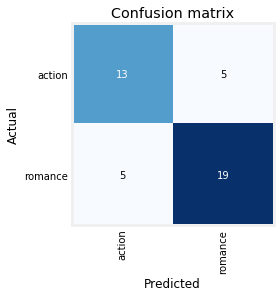

In [115]:
interp.plot_confusion_matrix()